In [2]:
%%time
%reset -f

import pandas as pd
from rdkit.Chem import AllChem, Draw, Descriptors   
from rdkit import Chem, DataStructs
from rdkit.Avalon.pyAvalonTools import GetAvalonFP
from rdkit.Chem import rdMolDescriptors
from rdkit.DataStructs import ExplicitBitVect

curcumin_variants = (
    "COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1OC)=[O+][B-](F)(F)O2)c(OC)c3",
    "COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC)cc(OC)cc1OC)=C2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(OC)cc1OC)=[O+][B-](F)(F)O2)c(OC)c3",
    "COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc2c1ccccc1cc3ccccc23)=C4)cc5",
    "COc3ccc(OC)c(C/C=C/C2=CC(/C=C/Cc1cc(OC)ccc1OC)=[O+][B-](F)(F)O2)c3",
    "COc3cc(C/C=C/C2=CC(/C=C/Cc1ccc(O)c(OC)c1)=[O+][B-](F)(F)O2)ccc3O",
    "F[B-]3(F)OC(/C=C/Cc1ccc(Br)cc1)=CC(/C=C/Cc2ccc(Br)cc2)=[O+]3",
    "C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)cc1)=[O+][B-](F)(F)O2)cc3",
    "C=C(OC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C(=C)OC)cc1)=[O+][B-](F)(F)O2)cc3",
    "CN(C)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+][B-](F)(F)O2)cc3",
    "CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N(CC)CC)cc2OCCC)=[O+][B-](F)(F)O3",
    "CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N(CC)CC)cc2OCCC)=[O+][B-](F)(F)O3",
    "N#Cc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccccc1)=C2)cc3",
    "COc6ccc(C/C=C/C5=CC(/C=C/Cc1cc2ccc3cccc4ccc(c1)c2c34)=[O+][B-](F)(F)O5)cc6",
    "COc4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(OC)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "CN(C)c4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(N(C)C)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "N#Cc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][B-](F)(F)O2)cc3",
    "CCCCN(CCCC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(CCCC)CCCC)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(C#N)cc1)=[O+][B-](F)(F)O2)cc3",
    "CN5/C(=C\C\C=C\C3=CC(/C=C/C/C=C/2N(C)c1ccccc1C2(C)C)=[O+][B-](F)(F)O3)C(C)(C)c4ccccc45",
    "COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccc(SC)cc1)=C2)cc3",
    "CSc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(SC)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(C)C)cc1)=[O+][B-](F)(F)O2)cc3",
    "COc5ccc(C/C=C/C4=[O+][B-](F)(F)OC(/C=C/Cc3ccc2c1ccccc1n(C)c2c3)=C4)cc5",
    "COc1ccccc1C/C=C/C3=CC(/C=C/Cc2ccccc2OC)=[O+][B-](F)(F)O3",
    "CCCCCC(CC)c5ccc(c4ccc(C/C=C/C3=CC(/C=C/Cc2ccc(c1ccc(C(CC)CCCCC)s1)s2)=[O+][B-](F)(F)O3)s4)s5"
)

molecule_names = ['2-ADMeO3', '3-MR83a', 'AD-10', 'AD-1013', 'AD-1022', 'AD-11', 'AD-12', 'AD-13', 'AD-13-DMF', 'AD-14-Moore', 'AD-15', 'AD-15-DMF', 'AD-16-DMF', 'AD-18', 'AD-24', 'AD-25', 'AD-3', 'AD-35', 'AD-4', 'AD-48', 'AD-5', 'AD-6', 'AD-7', 'AD-8', 'AD-9', 'YD-30']
homo_lumo_gap = [3.077, 3.072, 3.259, 2.625, 2.938, 2.946, 3.191, 3.226, 3.228, 2.811, 2.971, 2.813, 3.231, 2.735, 2.878, 2.686, 3.215, 2.77, 3.001, 2.702, 2.97, 2.89, 2.859, 2.97, 3.137, 2.525]

molecules = [Chem.MolFromSmiles(smiles) for smiles in curcumin_variants]
mws = [round(Descriptors.MolWt(mol),3) for mol in molecules]
logp = [Descriptors.MolLogP(mol) for mol in molecules]

# Create the initial DataFrame of Curcumin
data = {
    'Molecule': molecule_names,
    'Molecular Weight': mws,
    'LogP': logp,
    'Homo-Lumo Gap (eV)': homo_lumo_gap,
    'Smiles': curcumin_variants
}
curcumin_df = pd.DataFrame(data)

def generate_morgan_fingerprint_safe(smiles):
    """Generate Morgan fingerprint and handle errors gracefully."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return list(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048))
    except Exception:
        return None
    return None

# apply morgan fingerprint to the curcumin_df dataframe
curcumin_df['Morgan_Fingerprints'] = curcumin_df['Smiles'].apply(generate_morgan_fingerprint_safe)
curcumin_df = curcumin_df[curcumin_df['Morgan_Fingerprints'].notnull()].reset_index(drop=True)
morgan_df = pd.DataFrame(curcumin_df['Morgan_Fingerprints'].tolist(), columns=[f'morgan_{i}' for i in range(2048)])

curcumin_df_mf = pd.concat([curcumin_df.drop(columns=['Morgan_Fingerprints']), morgan_df], axis=1)

# Convert any fingerprint to a bit vector
def convert_to_bit_vector(fp, nBits=2048):
    bit_vector = ExplicitBitVect(nBits)
    for bit in fp.GetNonzeroElements().keys():
        bit_vector.SetBit(bit % nBits)
    return bit_vector

# Atom pair Fingerprint bit vector conversion
def generate_atom_pair_fingerprint(mol, nBits=2048):
    fp = rdMolDescriptors.GetAtomPairFingerprint(mol)
    return convert_to_bit_vector(fp, nBits)

# Function to generate fingerprints
def generate_fingerprint(mol, fp_type, radius=2, n_bits=2048):
    if fp_type == 'morgan':
        return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits, useChirality=True)
    elif fp_type == 'fcfp':
        return AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=n_bits, useChirality=True)
    elif fp_type == 'atom_pair':
        return generate_atom_pair_fingerprint(mol, nBits=n_bits)

# Similarity functions
def calculate_similarity(fp1, fp2, metric):
    if metric == 'tanimoto':
        return DataStructs.TanimotoSimilarity(fp1, fp2)
    elif metric == 'dice':
        return DataStructs.DiceSimilarity(fp1, fp2)
    elif metric == 'cosine':
        return DataStructs.CosineSimilarity(fp1, fp2)
    elif metric == 'kulczynski':
        return DataStructs.KulczynskiSimilarity(fp1, fp2)

curcumin_similarity_variants = {
    "seg01" : "Cc2ccc(/C=C/C(=O)CC(=O)/C=C/c1ccc(C)cc1)cc2",
    "seg02" : "C/C=C/C(=O)CC(=O)/C=C/c1ccc(C)cc1",
    "seg03" : "C/C=C/C(=O)CC(=O)/C=C/C",
    "seg04" : "Cc1ccc(/C=C/C=O)cc1",
    "seg05" : "C/C=C/C=O",
    "seg06" : "C/C=C/C1=CC(/C=C/C)=[O+][B-](F)(F)O1",
}

# Harvard OPV dataset import
data = pd.read_csv('https://raw.githubusercontent.com/AjStephan/havard-smile-opv/main/Non-fullerene%20small-molecules%20acceptors.csv')
opv_df = data.drop(columns=['index', 'inchikey',  'HOMO_calc', 'LUMO_calc', 'LUMO_calib',
       'LUMO_calib_stds', 'HOMO_calib', 'HOMO_calib_stds', 'molW',
       'PCE_calc', 'Voc_calc', 'Jsc_calc', 'FF_calc', 'EQE_calc',
       'PCE_calib', 'Voc_calib', 'Jsc_calib', 'FF_calib', 'EQE_calib',
       'PCE_cdiff', 'PCE_calib_plus'], axis=1)

opv_df["mol"] = opv_df["smiles"].apply(Chem.MolFromSmiles)

# Dictionary to hold the dataframes
similarity_dfs = {}

# Fingerprints and similarity methods
fingerprints = ['morgan', 'fcfp', 'atom_pair']
similarities = ['tanimoto', 'dice', 'cosine', 'kulczynski']

# Loop over curcumin segments, fingerprints, and similarities
for key, smiles in curcumin_similarity_variants.items():
    specific_mol = Chem.MolFromSmiles(smiles)
    
    for fp_type in fingerprints:
        specific_fp = generate_fingerprint(specific_mol, fp_type)
        
        for sim_metric in similarities:
            opv_df_sim_segment = opv_df.copy()
            opv_df_sim_segment[f'similarity_{key}_{fp_type}_{sim_metric}'] = opv_df_sim_segment['mol'].apply(lambda x: calculate_similarity(generate_fingerprint(x, fp_type), specific_fp, sim_metric))
            
            # Filter top 48% similar molecules
            quantile_value = opv_df_sim_segment[f'similarity_{key}_{fp_type}_{sim_metric}'].quantile(0.52)
            opv_df_sim_segment = opv_df_sim_segment[opv_df_sim_segment[f'similarity_{key}_{fp_type}_{sim_metric}'] >= quantile_value]
            
            # Keep only the relevant columns (initial columns + similarity)
            opv_df_sim_segment = opv_df_sim_segment[['smiles', 'mol', 'GAP_calib', f'similarity_{key}_{fp_type}_{sim_metric}']]
            
            # Store the filtered dataframe in the dictionary
            similarity_dfs[f'{key}_{fp_type}_{sim_metric}'] = opv_df_sim_segment

            print(f"Generated dataframe for segment {key}, fingerprint {fp_type}, similarity {sim_metric}: shape {opv_df_sim_segment.shape}")

Generated dataframe for segment seg01, fingerprint morgan, similarity tanimoto: shape (24756, 4)
Generated dataframe for segment seg01, fingerprint morgan, similarity dice: shape (24756, 4)
Generated dataframe for segment seg01, fingerprint morgan, similarity cosine: shape (24990, 4)
Generated dataframe for segment seg01, fingerprint morgan, similarity kulczynski: shape (24706, 4)
Generated dataframe for segment seg01, fingerprint fcfp, similarity tanimoto: shape (24771, 4)
Generated dataframe for segment seg01, fingerprint fcfp, similarity dice: shape (24771, 4)
Generated dataframe for segment seg01, fingerprint fcfp, similarity cosine: shape (24744, 4)
Generated dataframe for segment seg01, fingerprint fcfp, similarity kulczynski: shape (24671, 4)
Generated dataframe for segment seg01, fingerprint atom_pair, similarity tanimoto: shape (24639, 4)
Generated dataframe for segment seg01, fingerprint atom_pair, similarity dice: shape (24639, 4)
Generated dataframe for segment seg01, finge

In [3]:
%%time
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, rdMolDescriptors

# Function to generate Morgan fingerprints safely
def generate_morgan_fingerprint_safe(smiles):
    """Generate Morgan fingerprint and handle errors gracefully."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return list(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048))
    except Exception as e:
        print(f"Error generating Morgan fingerprint for SMILES {smiles}: {e}")
        return None
    return None

# Dictionary to store processed dataframes
processed_similarity_dfs = {}

# Process each dataframe
for combination, df in similarity_dfs.items():
    print(f"Processing {combination}...")
    
    # Make sure df is a copy, not a slice, to avoid the warning
    df = df.copy()

    # Generate Morgan fingerprints
    df['Morgan_Fingerprints'] = df['smiles'].apply(generate_morgan_fingerprint_safe)
    df = df[df['Morgan_Fingerprints'].notnull()].reset_index(drop=True)
    
    # Convert Morgan fingerprints to a DataFrame and concatenate with the original
    morgan_df = pd.DataFrame(df['Morgan_Fingerprints'].tolist(), columns=[f'morgan_{i}' for i in range(2048)])

    df_combined = pd.concat([df.drop(columns=['Morgan_Fingerprints']), morgan_df], axis=1)
    
    # Store the combined DataFrame
    processed_similarity_dfs[combination] = df_combined
    print(f"Finished processing {combination} - shape {df_combined.shape}")

# Unpacking the dictionary to individual DataFrames
for combination, df in processed_similarity_dfs.items():
    globals()[f'similarity_dfs_{combination}'] = df

Processing seg01_morgan_tanimoto...
Finished processing seg01_morgan_tanimoto - shape (24756, 2052)
Processing seg01_morgan_dice...
Finished processing seg01_morgan_dice - shape (24756, 2052)
Processing seg01_morgan_cosine...
Finished processing seg01_morgan_cosine - shape (24990, 2052)
Processing seg01_morgan_kulczynski...
Finished processing seg01_morgan_kulczynski - shape (24706, 2052)
Processing seg01_fcfp_tanimoto...
Finished processing seg01_fcfp_tanimoto - shape (24771, 2052)
Processing seg01_fcfp_dice...
Finished processing seg01_fcfp_dice - shape (24771, 2052)
Processing seg01_fcfp_cosine...
Finished processing seg01_fcfp_cosine - shape (24744, 2052)
Processing seg01_fcfp_kulczynski...
Finished processing seg01_fcfp_kulczynski - shape (24671, 2052)
Processing seg01_atom_pair_tanimoto...
Finished processing seg01_atom_pair_tanimoto - shape (24639, 2052)
Processing seg01_atom_pair_dice...
Finished processing seg01_atom_pair_dice - shape (24639, 2052)
Processing seg01_atom_pair_c

In [4]:
processed_similarity_dfs.keys()

dict_keys(['seg01_morgan_tanimoto', 'seg01_morgan_dice', 'seg01_morgan_cosine', 'seg01_morgan_kulczynski', 'seg01_fcfp_tanimoto', 'seg01_fcfp_dice', 'seg01_fcfp_cosine', 'seg01_fcfp_kulczynski', 'seg01_atom_pair_tanimoto', 'seg01_atom_pair_dice', 'seg01_atom_pair_cosine', 'seg01_atom_pair_kulczynski', 'seg02_morgan_tanimoto', 'seg02_morgan_dice', 'seg02_morgan_cosine', 'seg02_morgan_kulczynski', 'seg02_fcfp_tanimoto', 'seg02_fcfp_dice', 'seg02_fcfp_cosine', 'seg02_fcfp_kulczynski', 'seg02_atom_pair_tanimoto', 'seg02_atom_pair_dice', 'seg02_atom_pair_cosine', 'seg02_atom_pair_kulczynski', 'seg03_morgan_tanimoto', 'seg03_morgan_dice', 'seg03_morgan_cosine', 'seg03_morgan_kulczynski', 'seg03_fcfp_tanimoto', 'seg03_fcfp_dice', 'seg03_fcfp_cosine', 'seg03_fcfp_kulczynski', 'seg03_atom_pair_tanimoto', 'seg03_atom_pair_dice', 'seg03_atom_pair_cosine', 'seg03_atom_pair_kulczynski', 'seg04_morgan_tanimoto', 'seg04_morgan_dice', 'seg04_morgan_cosine', 'seg04_morgan_kulczynski', 'seg04_fcfp_tanim

In [9]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import lightgbm as lgb
import math

# Mappings for segments, fingerprint types, and similarity methods
segment_map = {
    'seg01': 'Segment 01',
    'seg02': 'Segment 02',
    'seg03': 'Segment 03',
    'seg04': 'Segment 04',
    'seg05': 'Segment 05',
    'seg06': 'Segment 06'
}

fingerprint_map = {
    'morgan': 'Morgan Fingerprint',
    'fcfp': 'FCFP Fingerprint',
    'atom_pair': 'Atom Pair Fingerprint'
}

similarity_map = {
    'tanimoto': 'Tanimoto Similarity',
    'dice': 'Dice Similarity',
    'cosine': 'Cosine Similarity',
    'kulczynski': 'Kulczynski Similarity'
}

# Initialize a list to store results
results = []

# Process each dataframe from the global namespace
for combination, df in processed_similarity_dfs.items():
    print(f"Processing {combination}...")
    
    # Extract features (X) and target (y)
    X = df.iloc[:, 4:]  # Assuming the first 4 columns are non-feature columns
    y = df['GAP_calib']  # Target variable
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
    
    # Initialize and train the LightGBM model
    tuned_params = {'n_estimators': 1000, 'learning_rate': 0.23685145356420312, 'num_leaves': 51}
    model = lgb.LGBMRegressor(**tuned_params)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R^2 scores and RMSE
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = math.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Extracting segment, fingerprint type, and similarity method from the combination name
    parts = combination.split('_')  # Split the combination string into parts
    
    # Handle the case where the fingerprint type is 'atom_pair'
    if '_'.join(parts[1:3]) == 'atom_pair':
        segment_key = parts[0]  # Assuming the segment is the first part
        fingerprint_type_key = '_'.join(parts[1:3])  # Join parts to get 'atom_pair'
        similarity_method_key = parts[3]  # Similarity method is the fourth part
    else:
        segment_key = parts[0]  # Assuming the segment is the first part
        fingerprint_type_key = parts[1]  # Fingerprint type is the second part
        similarity_method_key = parts[2]  # Similarity method is the third part
    
    # Map the keys to human-readable names using the mappings
    segment_name = segment_map.get(segment_key, segment_key)
    fingerprint_name = fingerprint_map.get(fingerprint_type_key, fingerprint_type_key)
    similarity_name = similarity_map.get(similarity_method_key, similarity_method_key)
    
    # Store results in the list
    results.append({
        'Segment': segment_name,
        'Fingerprint Type': fingerprint_name,
        'Similarity Method': similarity_name,
        'Train R2 Score': train_r2,
        'Test R2 Score': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse
    })
    
    print(f"Done processing {combination} with Test R^2 score: {test_r2} and Test RMSE: {test_rmse}")

# Convert results to a DataFrame for further analysis
final_results = pd.DataFrame(results)

# Save the results to a CSV file for further use
final_results.to_csv(path_or_buf=r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\Phase03.csv")

# Display the first few rows of the results
final_results.head()

Processing seg01_morgan_tanimoto...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2660
[LightGBM] [Info] Number of data points in the train set: 18567, number of used features: 1330
[LightGBM] [Info] Start training from score 2.844328
Done processing seg01_morgan_tanimoto with Test R^2 score: 0.9410532080273623 and Test RMSE: 0.1508524593170138
Processing seg01_morgan_dice...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2660
[LightGBM] [Info] Number of data points in the train set: 18567, number of used features: 1330
[LightGBM] [Info] Start training from score 2.844328
Done

,Segment,Fingerprint Type,Similarity Method,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE
0,Segment 01,Morgan Fingerprint,Tanimoto Similarity,0.992335,0.941053,0.054504,0.150852
1,Segment 01,Morgan Fingerprint,Dice Similarity,0.992335,0.941053,0.054504,0.150852
2,Segment 01,Morgan Fingerprint,Cosine Similarity,0.992420,0.936836,0.053884,0.154798
3,Segment 01,Morgan Fingerprint,Kulczynski Similarity,0.992750,0.940102,0.051906,0.150318
4,Segment 01,FCFP Fingerprint,Tanimoto Similarity,0.992546,0.934818,0.053480,0.157503


In [10]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Load the results from the CSV file
final_results = pd.read_csv(r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\Phase03.csv")

# Calculate the absolute variance between Train and Test R² scores
final_results['Variance'] = abs(final_results['Train R2 Score'] - final_results['Test R2 Score'])

# Create six plots, one for each segment
for segment in final_results['Segment'].unique():
    # Filter data for the current segment
    segment_data = final_results[final_results['Segment'] == segment]
    
    # Identify the best model (highest Test R² score)
    best_model = segment_data.loc[segment_data['Test R2 Score'].idxmax()]
    
    # Create a grouped bar plot for Train and Test R² scores
    fig = go.Figure()
    
    # Add bars for Train R² scores
    fig.add_trace(go.Bar(
        x=segment_data['Fingerprint Type'] + ' - ' + segment_data['Similarity Method'],
        y=segment_data['Train R2 Score'],
        name='Train R² Score',
        marker_color='blue',
        text=segment_data['Train R2 Score'].round(4),
        textposition='auto'
    ))
    
    # Add bars for Test R² scores
    fig.add_trace(go.Bar(
        x=segment_data['Fingerprint Type'] + ' - ' + segment_data['Similarity Method'],
        y=segment_data['Test R2 Score'],
        name='Test R² Score',
        marker_color='orange',
        text=segment_data['Test R2 Score'].round(4),
        textposition='auto'
    ))
    
    # Add a line for the absolute variance (secondary y-axis)
    fig.add_trace(go.Scatter(
        x=segment_data['Fingerprint Type'] + ' - ' + segment_data['Similarity Method'],
        y=segment_data['Variance'],
        mode='lines+markers',
        name='Absolute Variance',
        yaxis='y2',
        line=dict(color='red', dash='dash')
    ))
    
    # Update layout to include secondary y-axis
    fig.update_layout(
        title=f'R² Scores and Variance for {segment}',
        xaxis_title='Fingerprint Type - Similarity Method',
        yaxis_title='R² Score',
        yaxis2=dict(
            title='Absolute Variance',
            overlaying='y',
            side='right',
            showgrid=False,
            zeroline=False
        ),
        barmode='group',
        legend=dict(x=0.85, y=1.0),
        width=1000,
        height=600
    )
    
    # Add annotation for the best model
    fig.add_annotation(
        x=best_model['Fingerprint Type'] + ' - ' + best_model['Similarity Method'],
        y=best_model['Test R2 Score'],
        text=f"Best Model:<br>Test R²={best_model['Test R2 Score']:.4f}<br>{best_model['Fingerprint Type']} - {best_model['Similarity Method']}",
        showarrow=True,
        arrowhead=3,
        ax=0,
        ay=-50,
        font=dict(color="black", size=12),
        bgcolor="silver"
    )

    # legend orientation
    fig.update_layout(
    legend=dict(
        orientation='h',  # Horizontal orientation
        yanchor='bottom',
        y=1.01,  # Position above the plot
        xanchor='center',
        x=0.5  # Center horizontally
    )
)
    
    # Show the plot
    fig.show()

In [11]:
import pandas as pd
import plotly.graph_objects as go

# Load the results from the CSV file
final_results = pd.read_csv(r"C:\Users\Chamod Peiris\Documents\Curcumin_Scripts\Phase03.csv")

# Calculate the absolute variance between Train and Test R² scores
final_results['Variance'] = abs(final_results['Train R2 Score'] - final_results['Test R2 Score'])

# Initialize an empty DataFrame to store the best models from all segments
best_models_all_segments = pd.DataFrame()

# Process each segment to find the best model
for segment in final_results['Segment'].unique():
    # Filter data for the current segment
    segment_data = final_results[final_results['Segment'] == segment]
    
    # Identify the best model (highest Test R² score)
    best_model = segment_data.loc[segment_data['Test R2 Score'].idxmax()]
    
    # Append to the DataFrame of best models
    best_models_all_segments = best_models_all_segments.append(best_model, ignore_index=True)

# Create a grouped bar plot for Train and Test R² scores of the best models
fig = go.Figure()

# Add bars for Train R² scores
fig.add_trace(go.Bar(
    x=best_models_all_segments['Segment'] + ' - ' + best_models_all_segments['Fingerprint Type'] + ' - ' + best_models_all_segments['Similarity Method'],
    y=best_models_all_segments['Train R2 Score'],
    name='Train R² Score',
    marker_color='blue',
    text=best_models_all_segments['Train R2 Score'].round(4),
    textposition='auto'
))

# Add bars for Test R² scores
fig.add_trace(go.Bar(
    x=best_models_all_segments['Segment'] + ' - ' + best_models_all_segments['Fingerprint Type'] + ' - ' + best_models_all_segments['Similarity Method'],
    y=best_models_all_segments['Test R2 Score'],
    name='Test R² Score',
    marker_color='orange',
    text=best_models_all_segments['Test R2 Score'].round(4),
    textposition='auto'
))

# Add a line for the absolute variance (secondary y-axis)
fig.add_trace(go.Scatter(
    x=best_models_all_segments['Segment'] + ' - ' + best_models_all_segments['Fingerprint Type'] + ' - ' + best_models_all_segments['Similarity Method'],
    y=best_models_all_segments['Variance'],
    mode='lines+markers',
    name='Absolute Variance',
    yaxis='y2',
    line=dict(color='red', dash='dash')
))

# Update layout to include secondary y-axis
fig.update_layout(
    title='Best Models Across All Segments',
    xaxis_title='Model',
    yaxis_title='R² Score',
    yaxis2=dict(
        title='Absolute Variance',
        overlaying='y',
        side='right',
        showgrid=False,
        zeroline=False
    ),
    barmode='group',
    legend=dict(x=0.85, y=1.0),
    width=1000,
    height=600
)

# Add annotation for the best model
# Note: For a single annotation, you may need to specify manually or use another method to highlight specific points.

# legend orientation
fig.update_layout(
    legend=dict(
        orientation='h',  # Horizontal orientation
        yanchor='bottom',
        y=1.01,  # Position above the plot
        xanchor='center',
        x=0.5  # Center horizontally
    )
)

# Show the plot
fig.show()

C:\Users\Chamod Peiris\AppData\Local\Temp\ipykernel_20336\2427960453.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2486
[LightGBM] [Info] Number of data points in the train set: 18479, number of used features: 1243
[LightGBM] [Info] Start training from score 2.676840
___________________________________________________________________
Model similarity_dfs_seg01_atom_pair_tanimoto R2 Score: 0.9487464730741566 & RMSE value: 0.13028366756339974
Prediction with similarity_dfs_seg01_atom_pair_tanimoto model R2 Score: -0.31080840143022126 & RMSE value: 0.054317681864127484
___________________________________________________________________


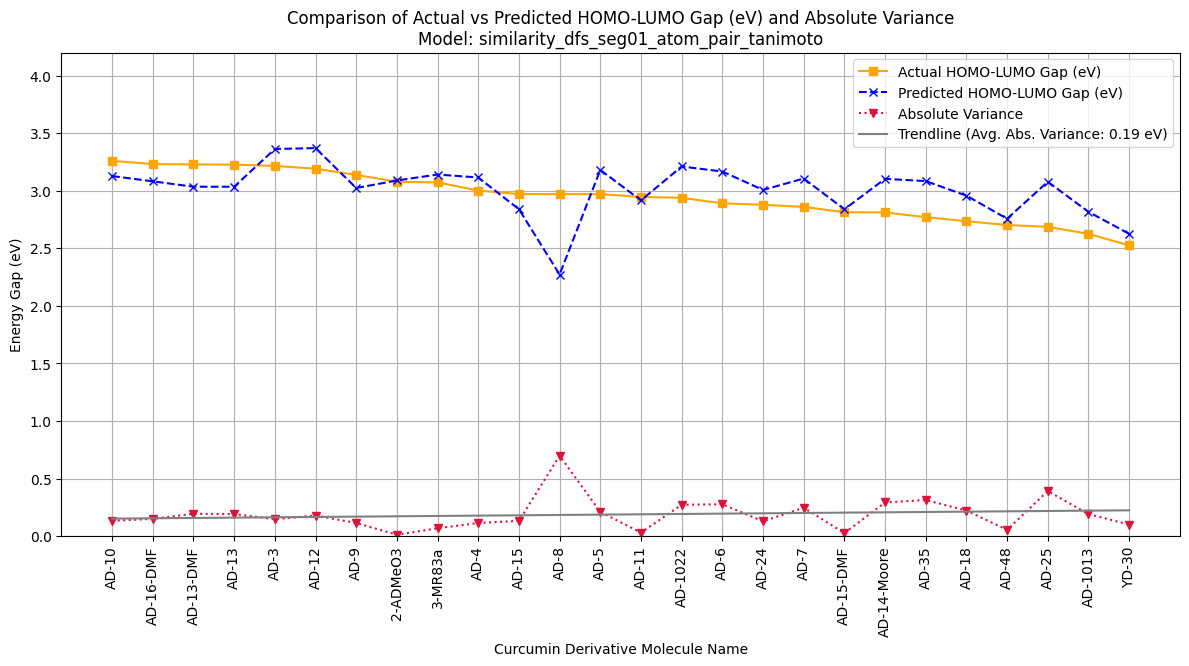

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2466
[LightGBM] [Info] Number of data points in the train set: 18646, number of used features: 1233
[LightGBM] [Info] Start training from score 2.678737
___________________________________________________________________
Model similarity_dfs_seg02_atom_pair_kulczynski R2 Score: 0.949478228468772 & RMSE value: 0.1331056987567867
Prediction with similarity_dfs_seg02_atom_pair_kulczynski model R2 Score: -0.4433991713377803 & RMSE value: 0.05981201898471689
___________________________________________________________________


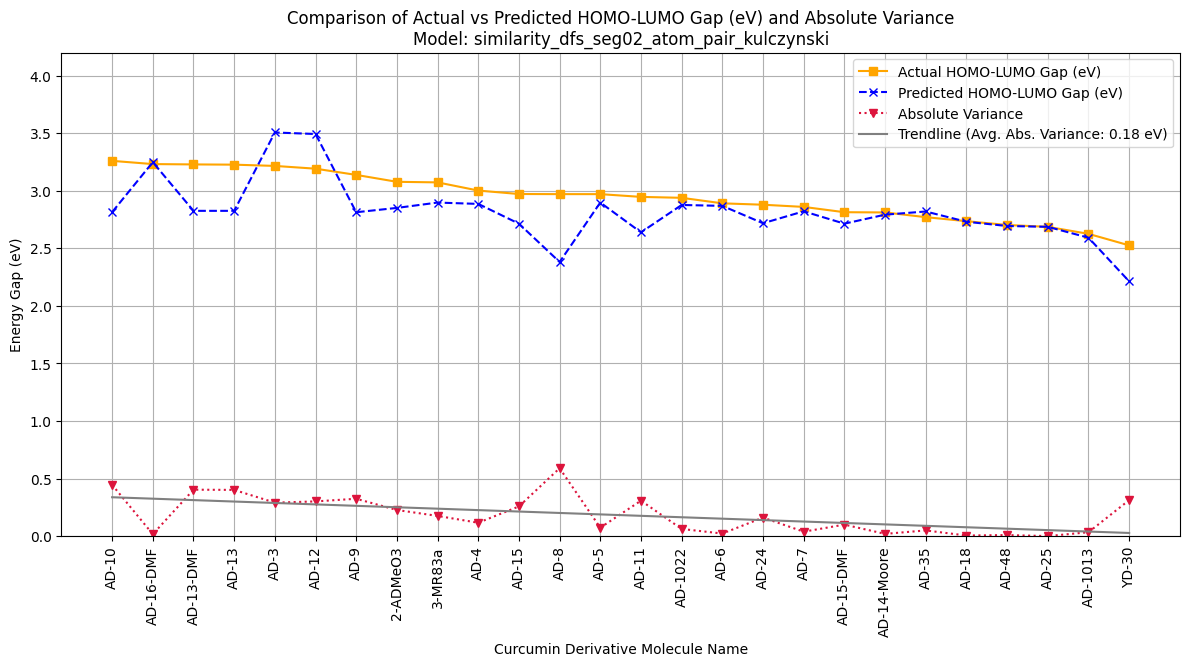

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2462
[LightGBM] [Info] Number of data points in the train set: 18508, number of used features: 1231
[LightGBM] [Info] Start training from score 2.688094
___________________________________________________________________
Model similarity_dfs_seg03_atom_pair_cosine R2 Score: 0.9518005417763531 & RMSE value: 0.1319544326705691
Prediction with similarity_dfs_seg03_atom_pair_cosine model R2 Score: -1.0498528177209008 & RMSE value: 0.08494243178466261
___________________________________________________________________


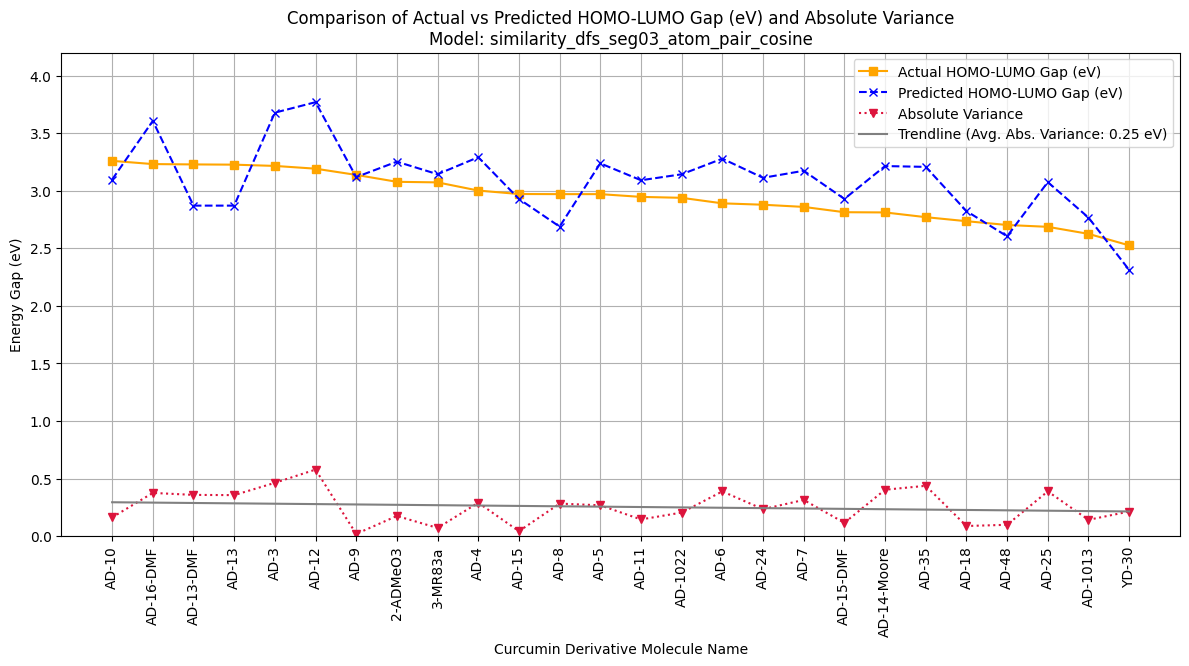

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2442
[LightGBM] [Info] Number of data points in the train set: 18544, number of used features: 1221
[LightGBM] [Info] Start training from score 2.678859
___________________________________________________________________
Model similarity_dfs_seg04_atom_pair_cosine R2 Score: 0.953745047979709 & RMSE value: 0.12787056195936505
Prediction with similarity_dfs_seg04_atom_pair_cosine model R2 Score: -1.996953026762922 & RMSE value: 0.12418866166239483
___________________________________________________________________


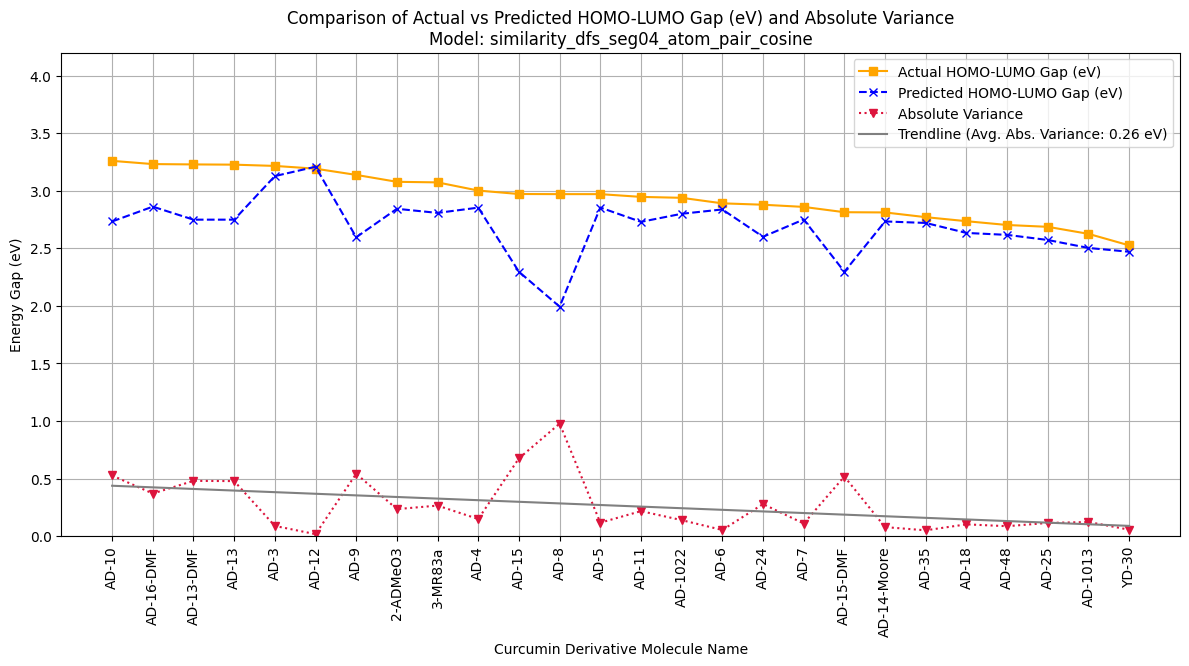

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2420
[LightGBM] [Info] Number of data points in the train set: 18509, number of used features: 1210
[LightGBM] [Info] Start training from score 2.663324
___________________________________________________________________
Model similarity_dfs_seg05_atom_pair_cosine R2 Score: 0.9516066103380925 & RMSE value: 0.12890409645916454
Prediction with similarity_dfs_seg05_atom_pair_cosine model R2 Score: -1.606845018728039 & RMSE value: 0.10802324599221208
___________________________________________________________________


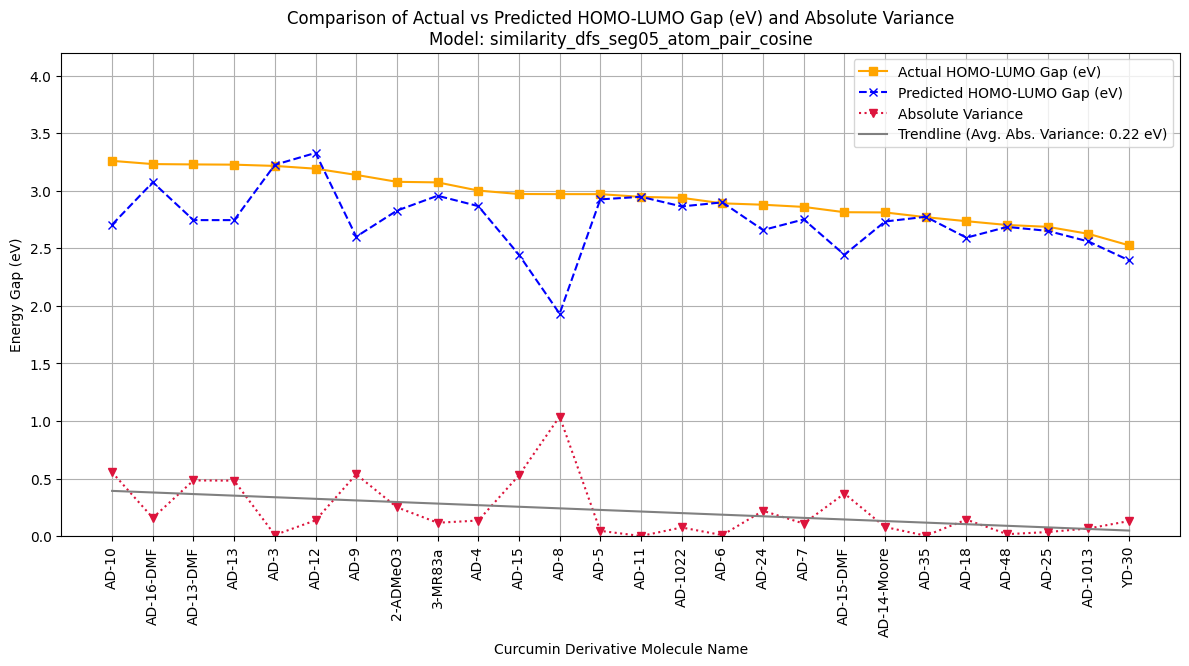

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2456
[LightGBM] [Info] Number of data points in the train set: 18477, number of used features: 1228
[LightGBM] [Info] Start training from score 2.674721
___________________________________________________________________
Model similarity_dfs_seg06_atom_pair_cosine R2 Score: 0.9519698410380755 & RMSE value: 0.1307357462403443
Prediction with similarity_dfs_seg06_atom_pair_cosine model R2 Score: -3.0463293179034814 & RMSE value: 0.16767303929968996
___________________________________________________________________


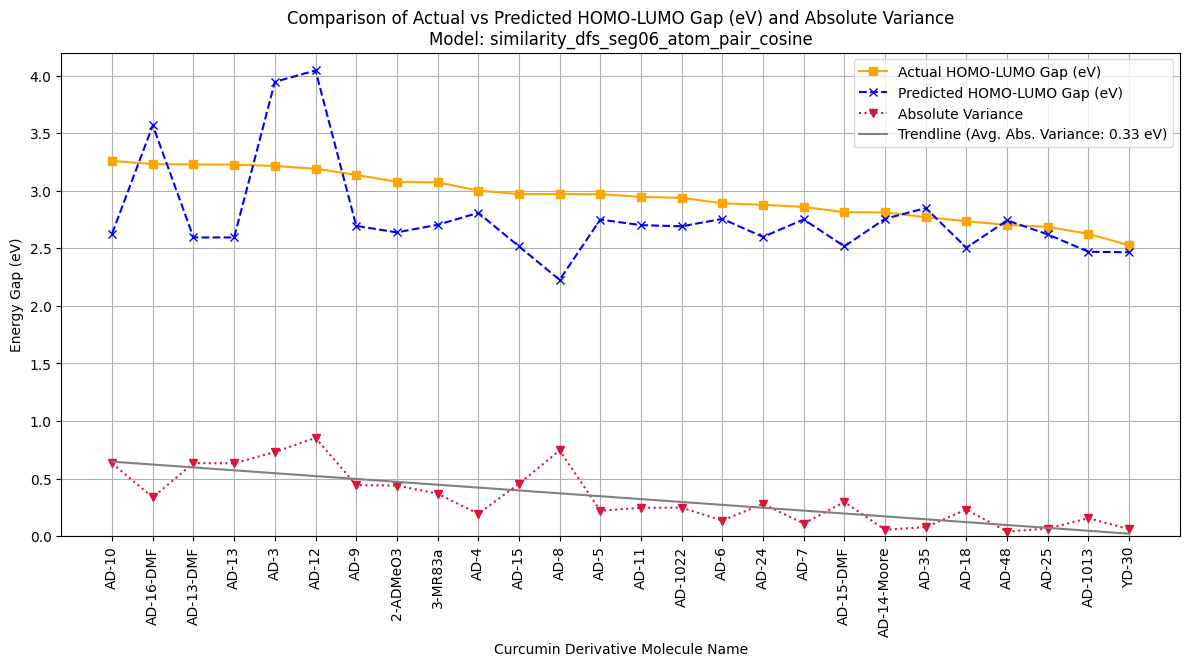

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# List of the best model dataframes
best_models_all_segments = ["similarity_dfs_seg01_atom_pair_tanimoto",
                            "similarity_dfs_seg02_atom_pair_kulczynski", 
                            "similarity_dfs_seg03_atom_pair_cosine", 
                            "similarity_dfs_seg04_atom_pair_cosine", 
                            "similarity_dfs_seg05_atom_pair_cosine", 
                            "similarity_dfs_seg06_atom_pair_cosine"]

# Iterate through the list of best models
for model_name in best_models_all_segments:
    # Dynamically reference the corresponding dataframe
    model_df = globals()[model_name]
    
    x = model_df.iloc[:, 4:]
    y = model_df['GAP_calib']
    
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)
    
    # Initialize and train the LightGBM model
    tuned_params = {'n_estimators': 1000, 'learning_rate': 0.23685145356420312, 'num_leaves': 51}
    model = lgb.LGBMRegressor(**tuned_params)
    model.fit(x_train, y_train)
    
    # Make predictions and calculate R^2 score
    y_pred = model.predict(x_test)
    
    # Calculate R2 score and RMSE for the model
    r2_model = r2_score(y_test, y_pred)
    rmse_model = mean_squared_error(y_test, y_pred, squared=False)
    
    curcumin_df_mf_pred = curcumin_df_mf.copy()
    curcumin_df_mf_pred['Homo-Lumo Gap (eV) Pred'] = model.predict(curcumin_df_mf.iloc[:, 5:])
    
    r2_predict = r2_score(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) Pred'])
    rmse_predict = mean_squared_error(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) Pred'])
    
    print("___________________________________________________________________")
    print(f"Model {model_name} R2 Score: {r2_model} & RMSE value: {rmse_model}")
    print(f"Prediction with {model_name} model R2 Score: {r2_predict} & RMSE value: {rmse_predict}")   
    print("___________________________________________________________________")
    
    # Sort curcumin_df_mf_pred by 'Homo-Lumo Gap (eV)' in descending order and reset the index
    curcumin_df_mf_pred = curcumin_df_mf_pred.sort_values(by='Homo-Lumo Gap (eV)', ascending=False).reset_index(drop=True)
    
    # Calculate the absolute variance between 'Homo-Lumo Gap (eV)' and 'Homo-Lumo Gap (eV) Pred'
    curcumin_df_mf_pred['absolute_variance'] = (curcumin_df_mf_pred['Homo-Lumo Gap (eV)'] - curcumin_df_mf_pred['Homo-Lumo Gap (eV) Pred']).abs()
    
    # Calculate linear trendline for absolute variance
    x_vals = curcumin_df_mf_pred.index
    y_vals = curcumin_df_mf_pred['absolute_variance']
    coefficients = np.polyfit(x_vals, y_vals, 1)  # Fit a linear polynomial
    trendline = np.polyval(coefficients, x_vals)
    
    # Calculate the average absolute variance
    average_variance = y_vals.mean()
    
    # Plotting the actual vs predicted energy gaps
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot the actual values
    ax1.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], marker='s', label='Actual HOMO-LUMO Gap (eV)', color='orange')
    
    # Plot the predicted values
    ax1.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) Pred'], marker='x', linestyle='--', label='Predicted HOMO-LUMO Gap (eV)', color='blue')
    
    # Plot the absolute variance as a dotted line
    ax1.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['absolute_variance'], marker='v', linestyle=':', label='Absolute Variance', color='crimson')
    
    # Plot the trendline for absolute variance
    ax1.plot(curcumin_df_mf_pred['Molecule'], trendline, linestyle='-', color='grey', label=f'Trendline (Avg. Abs. Variance: {average_variance:.2f} eV)')
    
    # Set labels for the axes and the range
    ax1.set_xlabel('Curcumin Derivative Molecule Name')
    ax1.set_ylabel('Energy Gap (eV)')
    ax1.set_ylim([0, 4.2])  # Adjust the y-axis range as needed
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper right')
    
    # Customize the plot
    plt.title(f'Comparison of Actual vs Predicted HOMO-LUMO Gap (eV) and Absolute Variance\nModel: {model_name}')
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=90)
    
    # Show the plot
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# List of the best model dataframes
best_models_all_segments = ["similarity_dfs_seg01_atom_pair_tanimoto",
                            "similarity_dfs_seg02_atom_pair_kulczynski", 
                            "similarity_dfs_seg03_atom_pair_cosine", 
                            "similarity_dfs_seg04_atom_pair_cosine", 
                            "similarity_dfs_seg05_atom_pair_cosine", 
                            "similarity_dfs_seg06_atom_pair_cosine"]

# Iterate through the list of best models
for model_name in best_models_all_segments:
    # Dynamically reference the corresponding dataframe
    model_df = globals()[model_name]
    
    x = model_df.iloc[:, 4:]
    y = model_df['GAP_calib']
    
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)
    
    # Initialize and train the LightGBM model
    tuned_params = {'n_estimators': 1000, 'learning_rate': 0.23685145356420312, 'num_leaves': 51}
    model = lgb.LGBMRegressor(**tuned_params)
    model.fit(x_train, y_train)
    
    # Make predictions and calculate R^2 score
    y_pred = model.predict(x_test)
    
    # Calculate R2 score and RMSE for the model
    r2_model = r2_score(y_test, y_pred)
    rmse_model = mean_squared_error(y_test, y_pred, squared=False)
    
    curcumin_df_mf_pred = curcumin_df_mf.copy()
    curcumin_df_mf_pred['Homo-Lumo Gap (eV) Pred'] = model.predict(curcumin_df_mf.iloc[:, 5:])
    
    r2_predict = r2_score(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) Pred'])
    rmse_predict = mean_squared_error(curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) Pred'])
    
    print("___________________________________________________________________")
    print(f"Model {model_name} R2 Score: {r2_model} & RMSE value: {rmse_model}")
    print(f"Prediction with {model_name} model R2 Score: {r2_predict} & RMSE value: {rmse_predict}")   
    print("___________________________________________________________________")
    
    # Sort curcumin_df_mf_pred by 'Homo-Lumo Gap (eV)' in descending order and reset the index
    curcumin_df_mf_pred = curcumin_df_mf_pred.sort_values(by='Homo-Lumo Gap (eV)', ascending=False).reset_index(drop=True)
    
    # Calculate the absolute variance between 'Homo-Lumo Gap (eV)' and 'Homo-Lumo Gap (eV) Pred'
    curcumin_df_mf_pred['absolute_variance'] = (curcumin_df_mf_pred['Homo-Lumo Gap (eV)'] - curcumin_df_mf_pred['Homo-Lumo Gap (eV) Pred']).abs()
    
    # Calculate linear trendline for absolute variance
    x_vals = curcumin_df_mf_pred.index
    y_vals = curcumin_df_mf_pred['absolute_variance']
    coefficients = np.polyfit(x_vals, y_vals, 1)  # Fit a linear polynomial
    trendline = np.polyval(coefficients, x_vals)
    
    # Calculate the average absolute variance
    average_variance = y_vals.mean()
    
    # Plotting the actual vs predicted energy gaps
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot the actual values
    ax1.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV)'], marker='s', label='Actual HOMO-LUMO Gap (eV)', color='orange')
    
    # Plot the predicted values
    ax1.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['Homo-Lumo Gap (eV) Pred'], marker='x', linestyle='--', label='Predicted HOMO-LUMO Gap (eV)', color='blue')
    
    # Plot the absolute variance as a dotted line
    ax1.plot(curcumin_df_mf_pred['Molecule'], curcumin_df_mf_pred['absolute_variance'], marker='v', linestyle=':', label='Absolute Variance', color='crimson')
    
    # Plot the trendline for absolute variance
    ax1.plot(curcumin_df_mf_pred['Molecule'], trendline, linestyle='-', color='grey', label=f'Trendline (Avg. Abs. Variance: {average_variance:.2f} eV)')
    
    # Set labels for the axes and the range
    ax1.set_xlabel('Curcumin Derivative Molecule Name')
    ax1.set_ylabel('Energy Gap (eV)')
    ax1.set_ylim([0, 4.2])  # Adjust the y-axis range as needed
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper right')
    
    # Customize the plot
    plt.title(f'Comparison of Actual vs Predicted HOMO-LUMO Gap (eV) and Absolute Variance\nModel: {model_name}')
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=90)
    
    # Show the plot
    plt.show()